In [1]:
print("Hello World")

Hello World


In [1]:
from dotenv import load_dotenv
import os
load_dotenv()


True

In [2]:
from langchain_google_genai import ChatGoogleGenerativeAI


In [7]:
chat_llm= ChatGoogleGenerativeAI(model="gemini-2.0-flash", temperature=0.9)

In [8]:
chat_llm.invoke("Hello, How are you?")

ChatGoogleGenerativeAIError: Error calling model 'gemini-2.0-flash' (RESOURCE_EXHAUSTED): 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_input_token_count, limit: 0, model: gemini-2.0-flash\n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 0, model: gemini-2.0-flash\n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 0, model: gemini-2.0-flash\nPlease retry in 21.119124831s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_input_token_count', 'quotaId': 'GenerateContentInputTokensPerModelPerMinute-FreeTier', 'quotaDimensions': {'location': 'global', 'model': 'gemini-2.0-flash'}}, {'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions': {'location': 'global', 'model': 'gemini-2.0-flash'}}, {'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerDayPerProjectPerModel-FreeTier', 'quotaDimensions': {'model': 'gemini-2.0-flash', 'location': 'global'}}]}, {'@type': 'type.googleapis.com/google.rpc.RetryInfo', 'retryDelay': '21s'}]}}

In [2]:
from typing import TypedDict
from  typing_extensions import Annotated 
import operator

    

In [3]:
from langchain_core.messages import AnyMessage, HumanMessage, AIMessage, SystemMessage


In [5]:

class GraphState(TypedDict):
    message: Annotated[list[AnyMessage] , operator.add ]

In [9]:
def llm_call(state: GraphState) -> dict:
    """Call the LLM using conversation messages and append AI response."""
    response = chat_llm.invoke(state["messages"])  # AIMessage
    return {
        "messages": [response]
    }

In [10]:
def token_counter(state: GraphState) -> dict:
    """Count tokens (simple word count) in the last AI message."""
    last_msg = state["messages"][-1]
    text = last_msg.content
    token_number = len(text.split())
    summary = f"Total token number in the generated answer (word count) is {token_number}"
    return {
        "messages": [AIMessage(content=summary)]
    }

In [11]:
from langgraph.graph import StateGraph

In [12]:
builder = StateGraph(GraphState)

In [13]:
builder.add_node("llm_call", llm_call)
builder.add_node("token_counter", token_counter)

In [14]:
builder.set_entry_point("llm_call")
builder.add_edge("llm_call", "token_counter")
builder.set_finish_point("token_counter")

In [15]:
app = builder.compile()

In [16]:
app.get_graph()

Graph(nodes={'__start__': Node(id='__start__', name='__start__', data=RunnableCallable(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), 'llm_call': Node(id='llm_call', name='llm_call', data=llm_call(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), 'token_counter': Node(id='token_counter', name='token_counter', data=token_counter(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), '__end__': Node(id='__end__', name='__end__', data=None, metadata=None)}, edges=[Edge(source='__start__', target='llm_call', data=None, conditional=False), Edge(source='llm_call', target='token_counter', data=None, conditional=False), Edge(source='token_counter', target='__end__', data=None, conditional=False)])

In [17]:
from IPython.display import Image, display

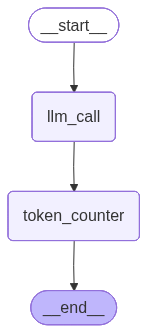

In [18]:
display(Image(app.get_graph().draw_mermaid_png()))

In [20]:
result = app.invoke({
    "messages": [HumanMessage(content="Hi, this is Nilesh. Say hello in detail.")]
})

NameError: name 'chat_llm' is not defined

In [21]:
for m in result["messages"]:
    print(type(m).__name__, ":", m.content)

NameError: name 'result' is not defined